In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inputs = "7"

df=pd.read_csv('csvs/' + inputs + 'lynx_train_X.csv', sep=' ',header=None)
new_train_X = df.values
df=pd.read_csv('csvs/' + inputs + 'lynx_train_Y.csv', sep=' ',header=None)
new_train_Y = df.values

X_train_inputs = []
Y_train_outputs = []

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# L = len(new_train_X)
L = len(new_train_X)
for i in range(L):
    X_train_inputs.append(tuple(new_train_X[i]))
for i in range(L):
    Y_train_outputs.append(tuple(new_train_Y[i]))

import multiprocessing
import os
import neat
import visualize

import warnings

xor_inputs = X_train_inputs
xor_outputs = Y_train_outputs

def eval_genome(genome, config):
    """
    This function will be run in parallel by ParallelEvaluator.  It takes two
    arguments (a single genome and the genome class configuration data) and
    should return one float (that genome's fitness).

    Note that this function needs to be in module scope for multiprocessing.Pool
    (which is what ParallelEvaluator uses) to find it.  Because of this, make
    sure you check for __main__ before executing any code (as we do here in the
    last few lines in the file), otherwise you'll have made a fork bomb
    instead of a neuroevolution demo. :)
    """

    net = neat.nn.FeedForwardNetwork.create(genome, config)
    error = 0.0
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = net.activate(xi)
        error -= (output[0] - xo[0]) ** 2
        # error -= np.abs(output[0] - xo[0])
    mse = error/L
    # mad = error/L
    return mse


def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)

    # Run for up to 300 generations.
    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = p.run(pe.evaluate, 10)

    return [stats,winner]

In [35]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward")

stats_list = []
winner_list = []
for i in range(10):
    [stats,winner] = run(config_path)
    stats_list.append(stats)
    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -0.29753 stdev: 0.24212
Best fitness: -0.04521 - size: (1, 1) - species 2 - id 54
Average adjusted fitness: 0.371
Mean genetic distance 3.406, standard deviation 1.025
Population of 200 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    59     -0.1    0.573     0
     2    0    67     -0.4    0.311     0
     3    0    18     -0.6    0.026     0
     4    0    35     -0.1    0.573     0
     5    0    19       --       --     0
     6    0     2       --       --     0
Total extinctions: 0
Generation time: 0.158 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.24515 stdev: 0.30312
Best fitness: -0.03515 - size: (1, 1) - species 5 - id 306
Average adjusted fitness: 0.772
Mean genetic distance 3.293, standard deviation 1.056
Population of 201 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  


 ****** Running generation 0 ****** 

Population's average fitness: -0.35541 stdev: 0.23958
Best fitness: -0.04441 - size: (1, 1) - species 3 - id 200
Average adjusted fitness: 0.270
Mean genetic distance 3.619, standard deviation 1.265
Population of 201 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    55     -0.4    0.228     0
     2    0    24     -0.6    0.066     0
     3    0    46     -0.2    0.522     0
     4    0     2     -0.7    0.000     0
     5    0    42     -0.1    0.536     0
     6    0     2       --       --     0
     7    0     7       --       --     0
     8    0    17       --       --     0
     9    0     1       --       --     0
    10    0     5       --       --     0
Total extinctions: 0
Generation time: 0.167 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.27138 stdev: 0.30011
Best fitness: -0.04288 - size: (1, 2) - species 1 - id 278
Average adjusted 

Population's average fitness: -0.22903 stdev: 0.28422
Best fitness: -0.02468 - size: (1, 3) - species 2 - id 1896
Average adjusted fitness: 0.881
Mean genetic distance 3.542, standard deviation 1.596
Population of 199 members in 16 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9     9     -0.2    0.888     4
     2    9     6     -0.2    0.897     2
     3    9    20     -0.2    0.893     2
     4    9     8     -0.2    0.879     0
     5    9    17     -0.2    0.898     2
     6    9    19     -0.3    0.794     2
     7    9    15     -0.4    0.720     3
     8    9    12     -0.1    0.917     0
     9    9    15     -0.2    0.871     0
    10    9    19     -0.1    0.969     0
    11    7    11     -0.2    0.914     6
    12    7    16     -0.3    0.811     4
    13    6     5     -0.1    0.948     2
    14    5    19     -0.2    0.861     0
    15    1     7     -0.1    0.948     0
    16    0     1       --       --     0
Tot

Average adjusted fitness: 0.852
Mean genetic distance 3.489, standard deviation 1.362
Population of 200 members in 15 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    27     -0.1    0.927     3
     2    8    14     -0.2    0.878     3
     3    8    11     -0.4    0.764     3
     4    8     8     -0.3    0.831     4
     5    8    11     -0.1    0.952     0
     6    8    13     -0.1    0.958     0
     7    7     5     -0.3    0.789     3
     8    7     8     -0.7    0.586     2
     9    6    12     -0.4    0.780     3
    10    6    22     -0.1    0.921     0
    11    3    14     -0.1    0.922     0
    12    3    17     -0.1    0.961     0
    13    3    14     -0.2    0.893     2
    14    2    18     -0.3    0.827     0
    15    2     6     -0.3    0.793     1
Total extinctions: 0
Generation time: 0.174 sec (0.156 average)

 ****** Running generation 9 ****** 

Population's average fitness: -0.24319 stdev: 0.34725
Be

    15    0     4       --       --     0
Total extinctions: 0
Generation time: 0.150 sec (0.148 average)

 ****** Running generation 8 ****** 

Population's average fitness: -0.22514 stdev: 0.34829
Best fitness: -0.03027 - size: (1, 1) - species 1 - id 1091
Average adjusted fitness: 0.840
Mean genetic distance 4.127, standard deviation 1.774
Population of 200 members in 16 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    21     -0.3    0.852     7
     2    8    30     -0.1    0.926     1
     3    8     5     -0.5    0.658     4
     4    8    13     -0.2    0.864     5
     5    8    14     -0.2    0.911     0
     6    8     9     -0.1    0.971     0
     7    8     5     -1.1    0.320     7
     8    7    18     -0.2    0.879     2
     9    5    12     -0.1    0.928     4
    10    3    16     -0.3    0.842     0
    11    3    13     -0.2    0.879     2
    12    3     9     -0.1    0.952     1
    13    3     9     -0.1

Population's average fitness: -0.23180 stdev: 0.29859
Best fitness: -0.01864 - size: (1, 2) - species 1 - id 1450
Average adjusted fitness: 0.873
Mean genetic distance 3.480, standard deviation 1.719
Population of 202 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8     8     -0.2    0.867     3
     2    8    14     -0.1    0.913     5
     3    8    16     -0.2    0.847     2
     4    8    13     -0.1    0.961     0
     5    8    16     -0.3    0.846     4
     6    8    10     -0.1    0.947     1
     7    8    33     -0.2    0.862     4
     8    8    28     -0.5    0.700     7
     9    8    26     -0.1    0.978     0
    10    7    16     -0.2    0.869     5
    11    5    14     -0.3    0.831     3
    12    2     8     -0.2    0.849     1
Total extinctions: 0
Generation time: 0.144 sec (0.157 average)

 ****** Running generation 9 ****** 

Population's average fitness: -0.22386 stdev: 0.30720
Best fitness: 

Population's average fitness: -0.25324 stdev: 0.31725
Best fitness: -0.02492 - size: (1, 2) - species 1 - id 1525
Average adjusted fitness: 0.822
Mean genetic distance 3.268, standard deviation 1.397
Population of 200 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    31     -0.1    0.950     2
     2    9    31     -0.3    0.823     4
     3    9     5     -0.2    0.893     1
     4    9    27     -0.2    0.868     0
     5    9    15     -0.3    0.818     5
     6    9    12     -0.1    0.944     0
     7    9    23     -0.6    0.618     5
     8    8    14     -0.1    0.959     0
     9    7    10     -0.1    0.948     6
    10    1    12     -0.5    0.687     0
    11    1    20     -0.7    0.529     0
Total extinctions: 0
Generation time: 0.157 sec (0.158 average)

 ****** Running generation 0 ****** 

Population's average fitness: -0.27591 stdev: 0.23697
Best fitness: -0.03342 - size: (1, 1) - species 1 - id 1

     6    8    17     -0.2    0.907     1
     7    8    33     -0.5    0.711     2
     8    8     9     -0.4    0.740     1
     9    7    19     -0.1    0.945     3
    10    6    14     -0.1    0.934     2
    11    4     6     -0.7    0.572     2
    12    2     4     -1.1    0.317     0
    13    1     6     -0.1    0.952     0
    14    0     1       --       --     0
Total extinctions: 0
Generation time: 0.160 sec (0.151 average)

 ****** Running generation 9 ****** 

Population's average fitness: -0.21843 stdev: 0.28577
Best fitness: -0.03017 - size: (1, 2) - species 5 - id 1695
Average adjusted fitness: 0.867
Mean genetic distance 3.695, standard deviation 1.860
Population of 198 members in 15 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    10     -0.2    0.883     1
     2    9    13     -0.3    0.853     2
     3    9    18     -0.2    0.901     5
     4    9    20     -0.1    0.969     0
     5    9    14     -0.2

Average adjusted fitness: 0.873
Mean genetic distance 2.648, standard deviation 0.951
Population of 200 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    28     -0.3    0.785     7
     2    9     6     -0.3    0.831     3
     3    9    15     -0.1    0.943     1
     4    9    11     -0.1    0.922     0
     5    9    15     -0.2    0.900     3
     6    9    18     -0.1    0.943     2
     7    9     7     -0.1    0.953     4
     8    9    14     -0.2    0.852     0
     9    8    22     -0.1    0.940     2
    10    8    23     -0.4    0.741     0
    11    8    14     -0.1    0.960     1
    12    7     9     -0.2    0.855     2
    13    6     6     -0.3    0.804     1
    14    4    12     -0.3    0.798     2
Total extinctions: 0
Generation time: 0.173 sec (0.170 average)

 ****** Running generation 0 ****** 

Population's average fitness: -0.30447 stdev: 0.24799
Best fitness: -0.04090 - size: (1, 1) - spec

Average adjusted fitness: 0.871
Mean genetic distance 2.937, standard deviation 1.251
Population of 201 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    30     -0.2    0.914     1
     2    9     8     -0.1    0.965     0
     3    9    17     -0.1    0.920     0
     4    9    19     -0.2    0.908     3
     5    9    12     -0.2    0.889     9
     6    9    45     -0.5    0.690     5
     7    8    19     -0.2    0.913     1
     8    8    11     -0.2    0.872     2
     9    5    17     -0.2    0.883     0
    10    4    10     -0.4    0.769     0
    11    2    13     -0.2    0.854     1
Total extinctions: 0
Generation time: 0.221 sec (0.154 average)

 ****** Running generation 0 ****** 

Population's average fitness: -0.32954 stdev: 0.24823
Best fitness: -0.03342 - size: (1, 1) - species 1 - id 101
Average adjusted fitness: 0.312
Mean genetic distance 3.365, standard deviation 1.168
Population of 201 members

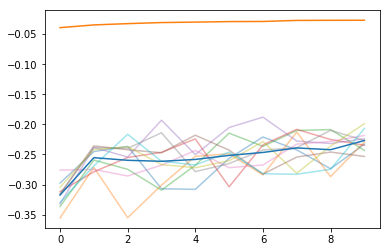

In [36]:
avg_fitness_list = []
best_list = []

for i in range(10):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()

In [37]:
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

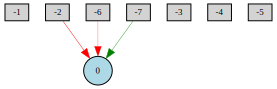

In [38]:
import graphviz
draw_net(config, winner_list[1])

In [19]:
def draw_net(
    config,
    genome,
    view=False,
    filename=None,
    node_names=None,
    show_disabled=True,
    prune_unused=False,
    node_colors=None,
    fmt="png",
):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    if graphviz is None:
        warnings.warn(
            "This display is not available due to a missing optional dependency (graphviz)"
        )
        return

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {"shape": "circle", "fontsize": "9", "height": "0.2", "width": "0.2"}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {
            "style": "filled",
            "shape": "box",
            "fillcolor": node_colors.get(k, "lightgray"),
        }
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {"style": "filled", "fillcolor": node_colors.get(k, "lightblue")}

        dot.node(name, _attributes=node_attrs)

    if prune_unused:
        connections = set()
        for cg in genome.connections.values():
            if cg.enabled or show_disabled:
                connections.add((cg.in_node_id, cg.out_node_id))

        used_nodes = copy.copy(outputs)
        pending = copy.copy(outputs)
        while pending:
            new_pending = set()
            for a, b in connections:
                if b in pending and a not in used_nodes:
                    new_pending.add(a)
                    used_nodes.add(a)
            pending = new_pending
    else:
        used_nodes = set(genome.nodes.keys())

    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {"style": "filled", "fillcolor": node_colors.get(n, "white")}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            # if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = "solid" if cg.enabled else "dotted"
            color = "green" if cg.weight > 0 else "red"
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(
                a, b, _attributes={"style": style, "color": color, "penwidth": width}
            )

    dot.render(filename, view=view)

    return dot